Main notebook for drawing Google-like plots

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
data = pickle.load(open('bigresult.bin', 'rb'))

yeardata = defaultdict(Counter)
for key, value in data.items():
    yeardata[value[1]] += value[0]

yearwordcounts = dict()
for key, value in yeardata.items():
    yearwordcounts[key] = sum(value.values())

del data

In [3]:
def prepare_dict(words, y_start, y_end):
    years = set(range(y_start, y_end + 1))
    readydict_s = {}
    for key, value in yeardata.items():
        d = {}
        for k, v in value.items():
            if k[0] in words:
                d[k[0]] = v / yearwordcounts[key] * 1e6
        readydict_s[key] = d
    readydict = defaultdict(dict)
    for key, value in readydict_s.items():
        for k, v in value.items():
            readydict[k][key] = v
    for key in readydict:
        for year in years:
            if year not in readydict[key].keys():
                readydict[key][year] = 0
    return readydict

In [4]:
def drawplot(dct):
    plt.figure(figsize=(30, 20))
    plt.tick_params(axis='both', which='major', labelsize=20)
    colors = ['maroon', 'tomato', 'sandybrown', 'gold', 'darkkhaki', 
    'greenyellow', 'palegreen', 'seagreen', 'darkslategray', 'steelblue', 
    'midnightblue', 'slateblue', 'blueviolet', 'plum', 'palevioletred']
    for item, color in zip(dct.items(), colors):
        lst = sorted(item[1].items())
        x = [e[0] for e in lst]
        y = [e[1] for e in lst]
        xnew = np.linspace(min(x), max(x), 300)  
        spl = make_interp_spline(x, y, k=3)
        power_smooth = spl(xnew)
        plt.plot(xnew, power_smooth, color=color, label=item[0])
    plt.legend(prop={'size': 16})
    plt.show()

In [5]:
def analyzer(words):
    if len(words) <= 15:
        drawplot(prepare_dict(words, 2002, 2021))
    else:
        print('Sorry we don\'t have enough colours to draw that')

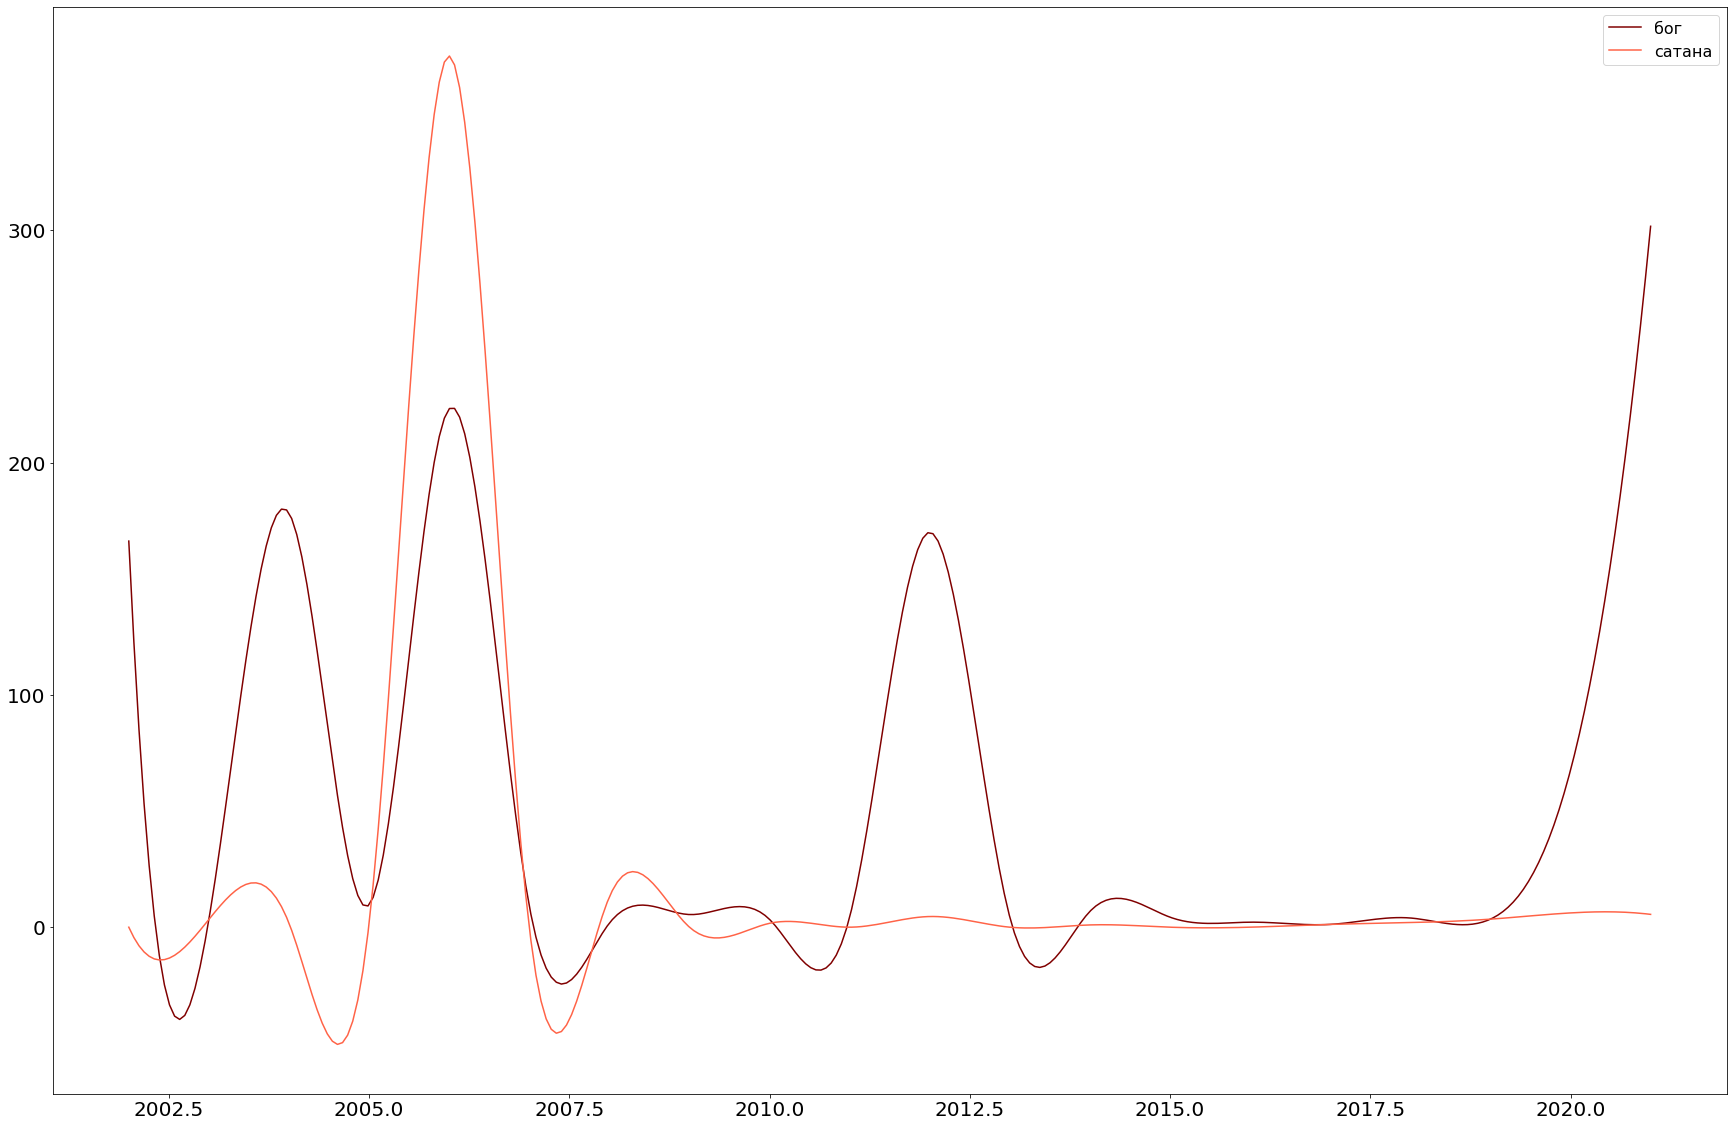

In [8]:
analyzer(set(input('Words you seek, master:\n').split()))